# Applying linear regression model to Healthcare for all case study

## Get our tookit - import modules / libraries 

In [52]:
# pandas, numpy, matplotlib, %matplotlib inline, seaborn 
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
#warnings.filterwarnings('ignore')


In [53]:
#import the model from sklearn
from sklearn import linear_model

#import evaluation metrics from sklearn
from sklearn.metrics import mean_squared_error,r2_score
#import TTsplit from sklearn
from sklearn.model_selection import train_test_split

In [54]:
data=pd.read_csv('regression_data.csv')

This is an ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Linear Regression Pros and Cons 

+ Pros: Easy to interpret results, computationally inexpensive
+ Cons: Poorly models nonlinear data
+ Works with: Numeric values, nominal values, normally distributed data 

## Get the data, review the shape and clarify headings. 

If any basic data clean steps are needed (eg nulls), do that now

- describe()
- dtypes
- shape
- info()
- unique()
- head()
- tail()
- query()
- value_counts()
- groupby().agg()

In [55]:
data.head()

,AVGGIFT,HV1_log,IC1_transformed,IC5_transformed,gender,TARGET_D
0,15.500000,7.760467,17.343389,4.181353,Male,21.0
1,3.080000,6.208590,16.230984,4.150313,Male,3.0
2,7.500000,7.113956,18.047227,4.205057,Female,20.0
3,6.700000,5.783825,11.737110,4.055333,Male,5.0
4,8.785714,6.643790,12.494862,4.088969,Female,10.0


## clarify the objective including determining the label (column) we wish to predict

once the label has been identified, set that as y and remove that field from the other data (X)

Our objective:

Given a predictor variable X and a response variable y, we fit a straight line to this data that minimizes the distance—most commonly the average squared distance—between the sample points and the fitted line. We can now use the intercept and slope learned from this data to predict the outcome variable of new data.


In [56]:
y=data['TARGET_D'] #Depenedent variable 

In [57]:
X=data.drop(['TARGET_D'],axis=1) #drop Y

# Pre processing

In Pre Processing the data analyst makes best efforts to give the ML model a 'fighting chance':
* cleaning the data, dealing with nulls, outliers 
* removing similar columns which present a multicollinearity risk
* eliminating heavily skewed data points through re-scaling 
* transforming all non numeric variables into numbers 

We will also need an important step to ensure relevance :
* To determine whether our machine learning algorithm not only performs well on the training set but also generalizes well to new data, we will  randomly divide the dataset into a separate training and test set. 
* We use the training set to train and optimize our machine learning model, while we keep the test set until the very end to evaluate the final model.

### Split the data into numeric and categorical features (columns) for pre processing - not including the label we will predict

In [58]:
X_num = X.select_dtypes(include = np.number)

In [59]:
X_num.head()

,AVGGIFT,HV1_log,IC1_transformed,IC5_transformed
0,15.500000,7.760467,17.343389,4.181353
1,3.080000,6.208590,16.230984,4.150313
2,7.500000,7.113956,18.047227,4.205057
3,6.700000,5.783825,11.737110,4.055333
4,8.785714,6.643790,12.494862,4.088969


In [60]:
X_cat = X.select_dtypes(include = object)

In [61]:
X_cat.head()

,gender
0,Male
1,Male
2,Female
3,Male
4,Female


### Initial pre-processing steps to consider 

- Check for multicollinearity
- if any columns are highly correlated, we should drop them now

- Transformation methods on a chosen feature- for one or more skewed columns or a column with distant, legitimate outliers
 **Box cox**  + 
 **Log transform**

- are there any other numerical columns we want to drop now because they are not correlated at all to the target variable?

- if we identify outliers, they can be removed by calculating the IQR (inter quartile range)


##### After making any changes to the data - replot to see the impact 

- if satisfied with a proposed change, replace the column 

### sklearn rescaling methods - for all numerical columns

+ the idea is to transform numerical features to make them present a gaussian/normal distribution- Linear Regression works best with normally distributed data


#### numerical rescaling - common options 

+ Normalizer 

+ StandardScaler

+ MinMaxScaler

[compare the effects of scalers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

[when to use which](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

- Use MinMaxScaler as your default
- Use RobustScaler if you have outliers and can handle a larger range
- Use StandardScaler if you need normalized features
- Use Normalizer sparingly - it normalizes rows, not columns


##### check the shape of each normalised numerical X before going further. 

In [62]:
# option 1 standardising all numeric features / rescaling using Normalizer 

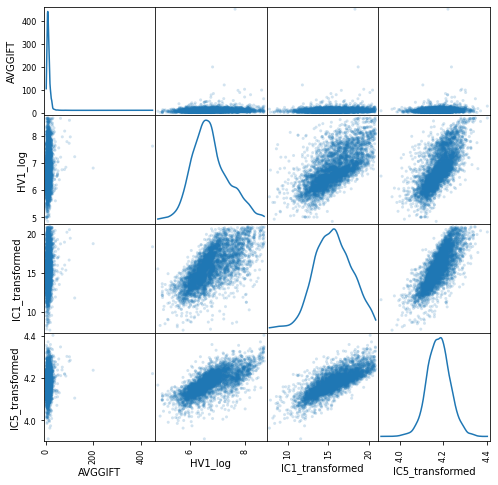

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(X_num, alpha=0.2, figsize=(8,8),diagonal='kde');

In [64]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(X_num)
X_normalized=transformer.transform(X_num)

In [65]:
X_normalized

array([[0.62312259, 0.31198208, 0.69722951, 0.16809648],
       [0.16988261, 0.34244528, 0.89524739, 0.22891755],
       [0.35345786, 0.3352645 , 0.85052457, 0.19817472],
       ...,
       [0.54236194, 0.313505  , 0.75336132, 0.20001218],
       [0.6463473 , 0.31813189, 0.66255726, 0.20504914],
       [0.68267219, 0.25989219, 0.66342472, 0.16211839]])

In [66]:
X_norm=pd.DataFrame(X_normalized,columns=['AVGGIFT','HV1_log','IC1_transformed','IC5_transformed'])

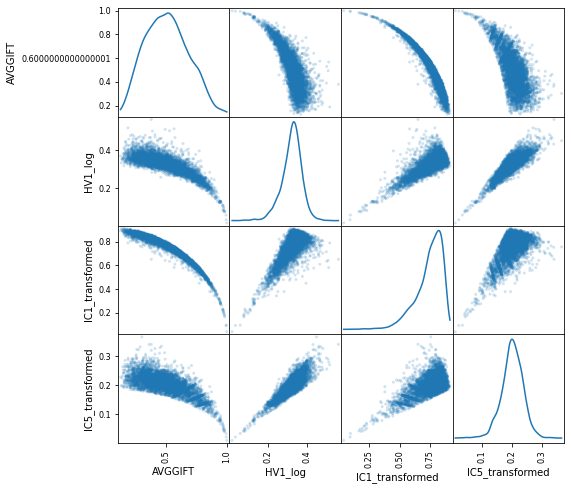

In [67]:
scatter_matrix(X_norm, alpha=0.2, figsize=(8,8), diagonal='kde');

In [68]:
#option 2 standardising all numeric features / rescaling using Standard Scaler

In [69]:
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X_num)
X_standardized=transformer.transform(X_num)

In [70]:
X_standardized

array([[ 0.37582816,  1.55744187,  0.74494534,  0.06032281],
       [-0.85426035, -0.83191217,  0.24813711, -0.52897815],
       [-0.41649938,  0.56203858,  1.05928459,  0.51035392],
       ...,
       [-0.03684243, -0.3045955 ,  0.02994518,  0.02525012],
       [ 0.1282258 , -0.5393703 , -1.0492367 , -1.02554166],
       [ 0.61581198,  0.1145073 ,  0.77815463,  1.48331225]])

In [71]:
X_std=pd.DataFrame(X_standardized,columns=['AVGGIFT','HV1_log','IC1_transformed','IC5_transformed'])

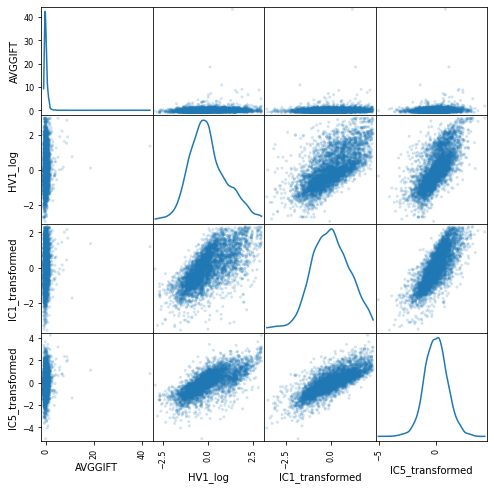

In [72]:
scatter_matrix(X_std, alpha=0.2, figsize=(8,8), diagonal='kde');

In [73]:
#option 3 standardising all numeric features / rescaling using MinMax scaler


### select which numerical transformation process you will use - this replaces X_num

In [74]:
x_num=X_normalized

## pre processing categorical columns 

In [75]:
#review categorical data 
X_cat

,gender
0,Male
1,Male
2,Female
3,Male
4,Female
...,...
4665,Male
4666,Male
4667,Female
4668,Male


### Turning categories into numbers 

#### One hot encoder 

[Explanation of OHE](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

In [76]:
#option 1 using OHE 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded


array([[1., 0.],
       [1., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 0.],
       [1., 0.]])

#### Label encoding 

[explanation of LE](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/)

In [77]:
#option 2 using LE- orders by value counts
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X_cat)
le.transform(X_cat) 


C:\Users\KofiSika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1, 1, 0, ..., 0, 1, 1])

#### Get Dummies 

[explanation of getting dummies](https://www.geeksforgeeks.org/python-pandas-get_dummies-method/)

In [78]:
#option 3 using dummies- replaces values with integers
pd.get_dummies(X_cat, drop_first=True)

,gender_Male,gender_U
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
4665,1,0
4666,1,0
4667,0,0
4668,1,0


### select which categorical transformation process you will use - this replaces X_cat

In [79]:
X_cat=encoded

## Bring categorical and numerical X back together 


**first, it is best to check the shape of both arrays to ensure no rows have been lost**

In [80]:
X = np.concatenate((X_num, X_cat), axis=1)

In [81]:
X_num.shape

(4670, 4)

In [82]:
X_cat.shape

(4670, 2)

In [83]:
#X = np.concatenate((x_normalized, encoded), axis=1)

#### check the shape of y matches x !

In [84]:
y.shape

(4670,)

In [85]:
X.shape

(4670, 6)

## Split the data into train and test, randomly, as a %, using 

> from sklearn.model_selection import train_test_split


In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4, random_state=100)

## Apply the model to pre processed data

In [87]:
lm=linear_model.LinearRegression() #configure model
model=lm.fit(X_train,y_train) #train model 
predictions=lm.predict(X_test) #set up preditction method
r2_score(y_test,predictions) #calculate my accuracy 

0.3073385797246876

### Measure the accuracy of linear regression 

One of the primary measures of accuracy we can use in linear regression is r2

r-squared tells us goodness of fit, ie how well the regression model fits the observed data. For example, an r-squared of 60% reveals that 60% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model. We want a single score to tell us how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data. 

The intercept (often labeled the constant) is the expected mean value of Y when all X=0. Start with a regression equation with one predictor, X. If X sometimes equals 0, the intercept is simply the expected mean value of Y at that value. 

If X never equals 0, then the intercept has no intrinsic meaning.

In linear regression, coefficients are the values that multiply the predictor values. 

The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.

A positive sign indicates that as the predictor variable increases, the response variable also increases.
A negative sign indicates that as the predictor variable increases, the response variable decreases.

The coefficient value represents the mean change in the response given a one unit change in the predictor. For example, if a coefficient is +3, the mean response value increases by 3 for every one unit change in the predictor.

## review against our objective, summarise the accuracy of your model :
+ what are we seeking to predict?
+ how accurately can we do that?
+ what might be some reasons for inaccuracy?
+ are there any improvements we can make?

## Additional Evaluation Metrics for LR

https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

MSE (mean squared error) represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.


A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line. ... In other words, the residual is the error that isn't explained by the regression line

RMSE (Root Mean Squared Error) is the square root of Mean Squared error. It measures the standard deviation of residuals.

The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model. It is calculated as:

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-p-1)]

where:

* R2: The R2 of the model
* n: The number of observations
* p: The number of predictor variables